<a href="https://colab.research.google.com/github/ferdevpy/Pylab/blob/main/Titanic_Machine_Learning_from_disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic - Machine Learning from Disaster


##Aquisição de Dados


In [162]:
import pandas as pd


In [163]:
df_train=pd.read_csv('https://raw.githubusercontent.com/ferdevpy/datasets/ferdevpy-master/train.csv')
df_test=pd.read_csv('https://raw.githubusercontent.com/ferdevpy/datasets/ferdevpy-master/test.csv')

print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


PassengerId: não altera o target <br>
<br>
Survived: target <br>
1= Survived <br>
0= Not Survived <br>
<br>
Pclass: Classe socioeconômica, varia de 1 a 3. <br>
1 = Classe alta<br>
2= Classe média<br>
3= Classe baixa<br>
<br>
SibSp = Número total de irmãos e cônjuges dos passageiros. <br>
<br>
Parch = número de pais e filhos dos passageiros. <br>
<br>
Ticket = número do bilhete do passageiro<br>
<br>
Fare = tarifa do passageiro<br>
<br>
Cabin = número da cabine do passageiro<br>
<br>
Embarked = porto de embarque do passageiro, variável categórica que possui 3 valores únicos (C, Q ou S):<br>
C = Cherbourg<br>
Q = Queenstown<br>
S = Southampton<br>



In [164]:
#Importando Bibliotecas
import pandas as pd 
import matplotlib 
import numpy as np 
import scipy as sp 
import IPython
from IPython import display 
import sklearn 
import random
import time
import warnings
warnings.filterwarnings('ignore')


In [165]:
# Modelos preditivos
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
# Auxiliares
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV
# DataViz
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

# Dataviz Config
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

##Preparando os dados utilizando os 4 C's: Corrigir, completar, criar e converter.

In [118]:
data_raw=pd.read_csv('https://raw.githubusercontent.com/ferdevpy/datasets/ferdevpy-master/train.csv')
data_val=pd.read_csv('https://raw.githubusercontent.com/ferdevpy/datasets/ferdevpy-master/test.csv')
y_true=pd.read_csv('https://raw.githubusercontent.com/ferdevpy/datasets/ferdevpy-master/gender_submission.csv')
#criando cópia dos dados
data1=data_raw.copy(deep=True)
#concatenando os datasets para altera-los juntos.
data_cleaner= [data1,data_val]

In [119]:
print('Null values Treino:\n',data1.isnull().sum())
print('Null values Test:\n',data_val.isnull().sum())

Null values Treino:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Null values Test:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [120]:
#Limpeza de dados

for dataset in data_cleaner:
  #substituindo os valores nulos em 'Age' pela mediana
  dataset['Age'].fillna(dataset['Age'].median(),inplace=True)

  #substituindo os campos nulos em 'Embarked' pela moda, uma vez que é a coluna
  #é composta por str, logo, não possui mediana.

  dataset['Embarked'].fillna(dataset['Embarked'].mode()[0],inplace=True)

  #substituindo os valores nulos em 'Fare' pela mediana
  dataset['Fare'].fillna(dataset['Fare'].median(),inplace=True)



In [121]:
#dropando colunas para dataset de treino

drop_column=['PassengerId','Cabin','Ticket']
data1.drop(drop_column, axis=1, inplace=True)

print(data1.isnull().sum())
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


#Criando novos Features

In [122]:

for dataset in data_cleaner:
  #feature nova, 'FamilySize'. É a soma de SibSp e Parch. É acrescido um porque em python tudo se inicia em 0.
  dataset['FamilySize']=dataset['SibSp']+dataset['Parch'] +1

  #feature nova, 'IsAlone'. Se o passageiro não tem família no navio, o valor é 1.
  dataset['IsAlone']=1 
  dataset['IsAlone'].loc[dataset['FamilySize']>1]=0 #se o tamanho da familia for maior que 1, IsAlone recebe 0

  #feature nova, 'Title'. 
  dataset['Title']=dataset['Name'].str.split(', ',expand=True)[1].str.split('.',expand=True)[0]


  #feature nova: FareBin, "cortamos os dados em 4(quartil)"; Segmentamos/classificamos em 4 grupos
  dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

  #feature nova: AgeBin para melhor distribuir os dados de idade por grupos, neste caso, 5. Segmentamos/classificamos em 5 grupos
  dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

data1.sample(10)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
39,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,11.2417,C,2,0,Miss,"(7.91, 14.454]","(-0.08, 16.0]"
75,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
476,0,2,"Renouf, Mr. Peter Henry",male,34.0,1,0,21.0000,S,2,0,Mr,"(14.454, 31.0]","(32.0, 48.0]"
580,1,2,"Christy, Miss. Julie Rachel",female,25.0,1,1,30.0000,S,3,0,Miss,"(14.454, 31.0]","(16.0, 32.0]"
595,0,3,"Van Impe, Mr. Jean Baptiste",male,36.0,1,1,24.1500,S,3,0,Mr,"(14.454, 31.0]","(32.0, 48.0]"
29,0,3,"Todoroff, Mr. Lalio",male,28.0,0,0,7.8958,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
348,1,3,"Coutts, Master. William Loch ""William""",male,3.0,1,1,15.9000,S,3,0,Master,"(14.454, 31.0]","(-0.08, 16.0]"
70,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,10.5000,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
598,0,3,"Boulos, Mr. Hanna",male,28.0,0,0,7.2250,C,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
103,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,8.6542,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"


In [123]:
# Limpar Title names raros, ou seja, os que diferem dos mais frequentes.
print(data1['Title'].value_counts())
title_names=(data1['Title'].value_counts()<10) #Conta quantas vezes um title se repete, se for menor que 10 retorna True
print('='*50)
title_names

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Mme               1
Capt              1
Sir               1
Ms                1
Lady              1
Jonkheer          1
Don               1
Name: Title, dtype: int64


Mr              False
Miss            False
Mrs             False
Master          False
Dr               True
Rev              True
Mlle             True
Major            True
Col              True
the Countess     True
Mme              True
Capt             True
Sir              True
Ms               True
Lady             True
Jonkheer         True
Don              True
Name: Title, dtype: bool

In [124]:
#Função que generaliza os titles pouco frequentes, substituindo-os por 'Misc'
data1['Title']=data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x]==True else x)
print(data1['Title'].value_counts())

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64


In [125]:
data1.info()
print('='*50)
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
 13  AgeBin      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   

#Converter


In [126]:
label= LabelEncoder()

for dataset in data_cleaner:
  dataset['Sex_Code']=label.fit_transform(dataset['Sex'])
  dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
  dataset['Title_Code'] = label.fit_transform(dataset['Title'])
  dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
  dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

In [127]:
#definindo variavel target

Target=['Survived']


In [128]:
#Selecionando colunas que já foram alteradas
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] # Nomes para gráficos
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] # modelos preditivos
data1_xy =  Target + data1_x
data1_xy

['Survived',
 'Sex',
 'Pclass',
 'Embarked',
 'Title',
 'SibSp',
 'Parch',
 'Age',
 'Fare',
 'FamilySize',
 'IsAlone']

In [129]:
# Variáveis a substituir, com LabelEncoder
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
data1_xy_bin

['Survived',
 'Sex_Code',
 'Pclass',
 'Embarked_Code',
 'Title_Code',
 'FamilySize',
 'AgeBin_Code',
 'FareBin_Code']

In [130]:
# Variáveis dummy
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
data1_dummy.head()

,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


Analise exploratória: estatística e dataviz

In [131]:
data1_x

['Sex',
 'Pclass',
 'Embarked',
 'Title',
 'SibSp',
 'Parch',
 'Age',
 'Fare',
 'FamilySize',
 'IsAlone']

In [132]:
# Correlação por sobrevivência
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
for x in data1_x:
    if data1[x].dtype != 'float64' :
        print('Correlação sobrevivência:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        

#crosstabs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html
print(pd.crosstab(data1['Title'],data1[Target[0]]))

Correlação sobrevivência: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Correlação sobrevivência: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Correlação sobrevivência: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Correlação sobrevivência: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Correlação sobrevivência: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Correlação sobrevivência: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Correlação sobrevivência: FamilySize
   FamilySize  Survived
0           1  0.30

In [133]:

data1[[x, Target[0]]]

,IsAlone,Survived
0,0,0
1,0,1
2,1,1
3,0,1
4,1,0
...,...,...
886,1,0
887,1,1
888,0,0
889,1,1


In [134]:
data1[[x, Target[0]]].groupby(x, as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


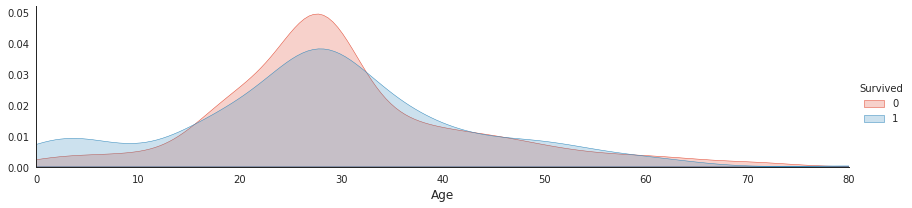

In [135]:
# Distribuição por idade: sobreviventes/não-sobreviventes
a = sns.FacetGrid( data1, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , data1['Age'].max()))
a.add_legend()


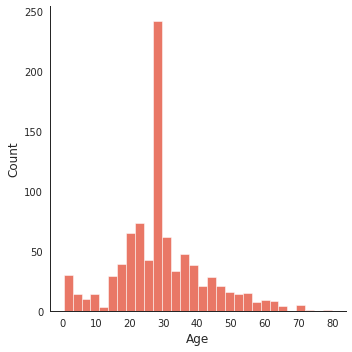

In [136]:
sns.displot(data1['Age'],kind='hist')
#Observe que grande parte dos passageiros tem entre 20 e 35 anos.

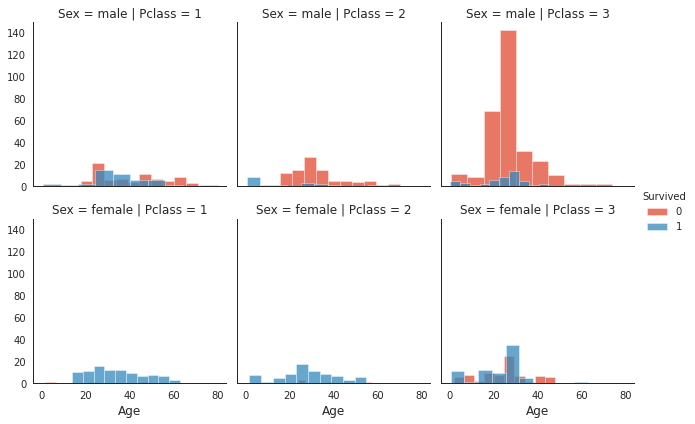

In [137]:
# Comparativo Sexo/Classe/Idade
h = sns.FacetGrid(data1, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()


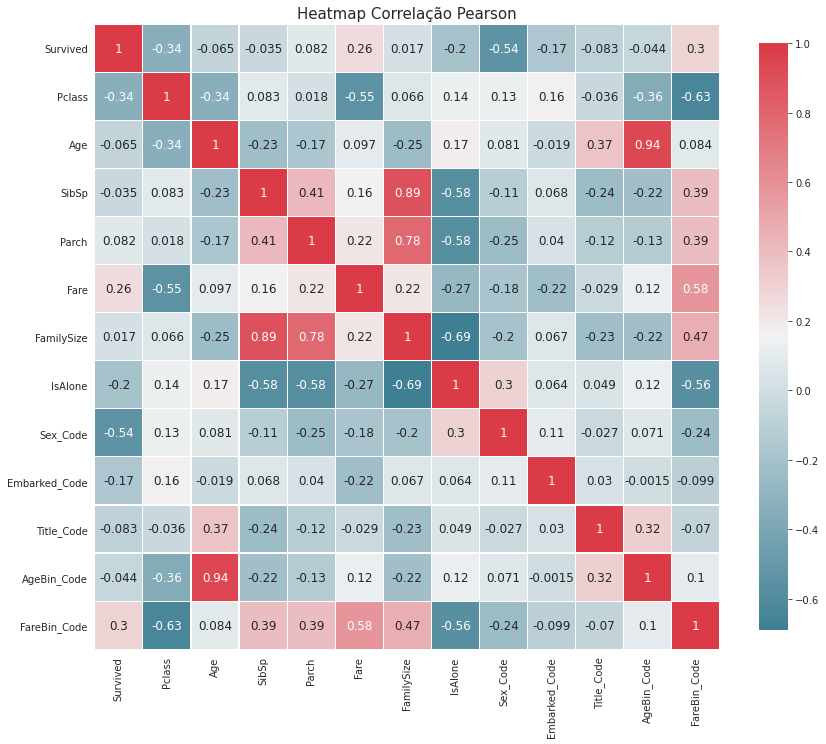

In [138]:

# Heatmap de Correlação
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Heatmap Correlação Pearson', y=1.05, size=15)

correlation_heatmap(data1)


In [139]:

# Instanciar diversos algoritmos de CLASSIFICAÇÃO
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]
    


In [140]:

# splitter http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) 

# comparar métricas
MLA_columns = ['MLA Nome', 'MLA Parametros','Acurácia média TREINO', 'Acurácia média TESTE', 'TEMPO UTILIZADO(média)']
MLA_compare = pd.DataFrame(columns = MLA_columns)

# comparar predições
MLA_predict = data1[Target]

# salvamos performance na tabela
row_index = 0


In [141]:

for alg in MLA:

    # setamos nome do algoritmo e parametros
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Nome'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parametros'] = str(alg.get_params())
    
    # resultados com cross validation
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv=cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'TEMPO UTILIZADO(média)'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'Acurácia média TREINO'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'Acurácia média TESTE'] = cv_results['test_score'].mean()     

    # salvamos as predições, algoritmo por algoritmo
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    row_index+=1

In [142]:

MLA_compare.sort_values(by = ['Acurácia média TESTE'], ascending = False, inplace = True)
MLA_compare

,MLA Nome,MLA Parametros,Acurácia média TREINO,Acurácia média TESTE,TEMPO UTILIZADO(média)
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.856367,0.829478,0.0285049
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.895131,0.827985,0.147565
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.835206,0.827612,0.0429089
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.834082,0.826119,0.0504002
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.895131,0.824627,0.113009
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.866667,0.822015,0.0791861
17,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.895131,0.821642,0.00250862
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.889139,0.817537,0.0188966
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.850375,0.813806,0.0025969
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.820412,0.81194,0.0736959


In [143]:
MLA_predict

,Survived,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier,GaussianProcessClassifier,LogisticRegressionCV,PassiveAggressiveClassifier,RidgeClassifierCV,SGDClassifier,Perceptron,BernoulliNB,GaussianNB,KNeighborsClassifier,SVC,NuSVC,LinearSVC,DecisionTreeClassifier,ExtraTreeClassifier,LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis,XGBClassifier
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1
2,1,1,0,0,0,0,0,1,0,1,1,0,1,1,0,1,1,1,0,0,1,1,0
3,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
887,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
888,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,1,0,0,1,0,0
889,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0


Text(0, 0.5, 'Algoritmo')

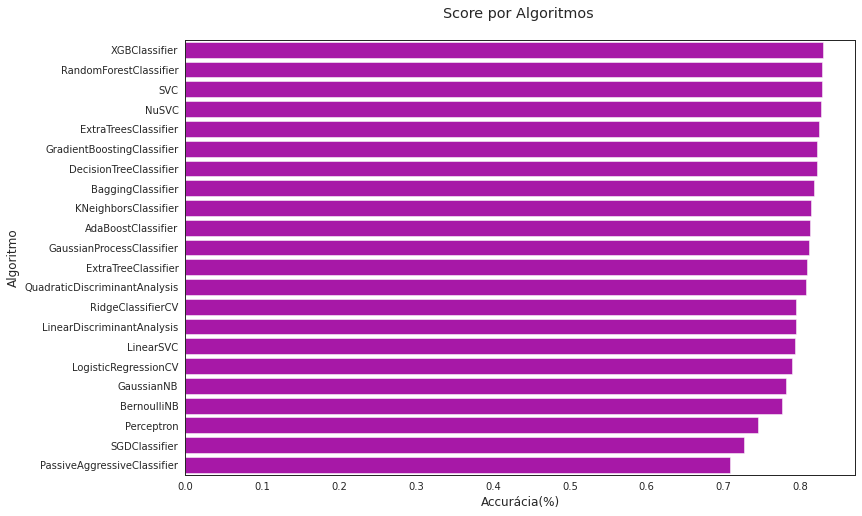

In [144]:

#barplot seaborn https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='Acurácia média TESTE', y = 'MLA Nome', data = MLA_compare, color = 'm')
# pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Score por Algoritmos \n')
plt.xlabel('Accurácia(%)')
plt.ylabel('Algoritmo')


In [160]:
#utilizaremos o modelo preditivo com melhor desempenho: XGBClassifier

#submit_xgb=XGBClassifier(learning_rate=0.01, random_state=2)
#metLearn=CalibratedClassifierCV(submit_xgb, method='isotonic', cv=2)
#submit_xgb.fit(data1[data1_x_bin],data1[Target])
tol=0.001
ep=50
error=10
i=0
while error>tol and i<ep:
  submit_xgb=XGBClassifier(learning_rate=0.08)
  metLearn=CalibratedClassifierCV(submit_xgb, method='isotonic', cv=2)
  metLearn.fit(data1[data1_x_bin], data1[Target])
  testPredictions = metLearn.predict(data_val[data1_x_bin])
  accuracy=metrics.accuracy_score(y_true['Survived'],testPredictions)
  error=metrics.mean_absolute_error(y_true['Survived'],testPredictions)
  i=i+1
  print(f"Epoch:{i}, Accuracy: {accuracy:.4f}, Mean Absolute Error: {error:.4f}")
data_val['Survived']=metLearn.predict(data_val[data1_x_bin])

Epoch:1, Accuracy: 0.9426, Mean Absolute Error: 0.0574
Epoch:2, Accuracy: 0.9426, Mean Absolute Error: 0.0574
Epoch:3, Accuracy: 0.9426, Mean Absolute Error: 0.0574
Epoch:4, Accuracy: 0.9426, Mean Absolute Error: 0.0574
Epoch:5, Accuracy: 0.9426, Mean Absolute Error: 0.0574
Epoch:6, Accuracy: 0.9426, Mean Absolute Error: 0.0574
Epoch:7, Accuracy: 0.9426, Mean Absolute Error: 0.0574
Epoch:8, Accuracy: 0.9426, Mean Absolute Error: 0.0574
Epoch:9, Accuracy: 0.9426, Mean Absolute Error: 0.0574
Epoch:10, Accuracy: 0.9426, Mean Absolute Error: 0.0574
Epoch:11, Accuracy: 0.9426, Mean Absolute Error: 0.0574
Epoch:12, Accuracy: 0.9426, Mean Absolute Error: 0.0574
Epoch:13, Accuracy: 0.9426, Mean Absolute Error: 0.0574
Epoch:14, Accuracy: 0.9426, Mean Absolute Error: 0.0574
Epoch:15, Accuracy: 0.9426, Mean Absolute Error: 0.0574
Epoch:16, Accuracy: 0.9426, Mean Absolute Error: 0.0574
Epoch:17, Accuracy: 0.9426, Mean Absolute Error: 0.0574
Epoch:18, Accuracy: 0.9426, Mean Absolute Error: 0.0574
E

In [161]:
#submit File
submit=data_val[['PassengerId','Survived']]
submit.to_csv('submit.csv',index=False)